Voici le code final du projet de DeepLearning. Les résultats obtenus l'ont été après enormémenent de phases d'entrainements et ne sont pas issus de ce code. Cependant le reseau final a une architecture exactement semblable à celui créé dans ce code. Par soucis de temps le code n'a pas été compilé mais retrace toute l'experimentation qui a été faite durant ce projet. Les differents tests étant très couteux en calculs ont étés fait dans des notebooks paralleles et nous n'avons gardé que l'essentiel. 

In [2]:
pip install pybind11

     |████████████████████████████████| 153kB 1.3MB/s 


In [3]:
#Connect to our own Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/My Drive/DeepLearningProject/"
!ls

/content/gdrive/My Drive/DeepLearningProject
Alphgit.h5				golois_res.py	     model_SGD0_1.h5
AlphgoYt.h5				golois_test.py	     policy.npy
Best2ful.h5				Gouteuxcool.h5	     ProjetGo.ipynb
Board.h					GouteuxcoolUP.h5     Projet.ipynb
caz2relu.h5				GouteuxFinal2	     __pycache__
compileMAC.sh				GouteuxFinal2.h5     README
compile.sh				GouteuxFinal3.h5     Rzone.h
convert					GouteuxFinal4.h5     save.py
convert.cpp				GouteuxFinal5.h5     setup.py
dernierbest2.h5				GouteuxFinal6.h5     testCaz.h5
dernierbest.h5				GouteuxFinal7.h5     testCazRes2.h5
end.npy					GouteuxFinal.h5      testCazRes.h5
Game.h					GouteuxFinalTrained  TESTGO2712bis.h5
games.data				input_data.npy	     TESTGO2712.h5
games.txt				LeBonOriginal.h5     test.h5
golois.cpp				ls.sh		     value.npy
golois.cpython-36m-x86_64-linux-gnu.so	model_11_dec.h5
golois.cpython-37m-x86_64-linux-gnu.so	model_4.8.h5


In [5]:
 ! c++ -O3 -Wall -shared -std=c++11 -fPIC `python3 -m pybind11 --includes` golois.cpp -o golois`python3-config --extension-suffix`

In file included from golois.cpp:17:0:
Board.h: In member function ‘bool Board::isCapturedLadder(int, int, Rzone*)’:
Board.h:1742:8: warning: unused variable ‘n1’ [-Wunused-variable]
    int n1 = nbLiberties (inter, liberties1, stones1, 3);
        ^~
Board.h:1763:12: warning: unused variable ‘n1’ [-Wunused-variable]
        int n1 = nbLiberties (inter, liberties1, stones1, 3);
            ^~
Board.h: In member function ‘void Board::computeLadders(int)’:
Board.h:1792:9: warning: unused variable ‘other’ [-Wunused-variable]
     int other = opponent (color);
         ^~~~~
Board.h: In member function ‘void Board::computeAllLadders(int, bool)’:
Board.h:2038:9: warning: unused variable ‘n1’ [-Wunused-variable]
     int n1 = nbLiberties (i, liberties1, stones1);
         ^~
Board.h:2074:7: warning: unused variable ‘n1’ [-Wunused-variable]
   int n1 = nbLiberties (i, liberties1, stones1);
       ^~
Board.h:2107:9: warning: unused variable ‘n1’ [-Wunused-variable]
     int n1 = nbLiberties (i

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
import pybind11
import golois

planes = 8
moves = 361
dynamicBatch = True

Test des réseaux precedents dans le rapport, le code ne contient que le réseau final, pour plus de lisibilité tout les tests sur les réseaux ont étés fait dans un autre notebook 


In [0]:
# RESEAU FINAL 

input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(37, 3, activation='relu', padding='same')(input)
y=x
x = layers.Conv2D(32, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(32, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(66, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(66, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(66, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(66, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])

x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x

policy_head = layers.Conv2D(1, 3, activation='relu', padding='same')(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Dense(moves, activation='softmax', name='policy')(policy_head)
value_head = layers.Flatten()(x)
value_head = layers.Dense(1, activation='sigmoid', name='value')(value_head)

modfinal = keras.Model(inputs=input, outputs=[policy_head, value_head])

modfinal.summary ()

modfinal.compile(optimizer=keras.optimizers.SGD(lr=0.1),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})


In [7]:
modelfinalgo = tf.keras.models.load_model(
    'GouteuxFinal6.h5',
    custom_objects=None,
    compile=True)
modelfinalgo.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
board (InputLayer)              [(None, 19, 19, 8)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 19, 19, 32)   2336        board[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 19, 19, 32)   25632       conv2d[0]

In [0]:

input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(37, 3, activation='relu', padding='same')(input)
y=x
x = layers.Conv2D(32, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(32, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(66, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(66, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(66, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(66, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])

x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x
x = layers.Conv2D(64, 5, activation='relu', padding='same')(x)
y = layers.Conv2D(64, 1, activation='relu', padding='same')(y)
x = layers.add([x,y])
y=x


policy_head = layers.Conv2D(1, 3, activation='relu', padding='same')(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Dense(moves, activation='softmax', name='policy')(policy_head)
value_head = layers.Flatten()(x)
value_head = layers.Dense(1, activation='sigmoid', name='value')(value_head)

modelplot = keras.Model(inputs=input, outputs=[policy_head, value_head])

modelplot.compile(optimizer=keras.optimizers.SGD(lr=0.1),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

#Test de l'optimizer : 


In [0]:
modelSGD = tf.keras.models.load_model(
      'GouteuxFinal.h5',
    custom_objects=None,
    compile=True)

modelAdam = tf.keras.models.load_model(
      'GouteuxFinal.h5',
    custom_objects=None,
    compile=True)

modelRms =  tf.keras.models.load_model(
      'GouteuxFinal.h5',
    custom_objects=None,
    compile=True)

In [0]:

modelSGD.compile(optimizer=keras.optimizers.SGD(),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

modelAdam.compile(optimizer=keras.optimizers.Adam(),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

modelRms.compile(optimizer=keras.optimizers.RMSprop(),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

## Entrainement Rapide

In [0]:
dynamicBatch = True

for i in range(10):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 100000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    modelSGD.fit(input_data, {'policy': policy, 'value': value},
            epochs=8, batch_size=128, validation_split=0.1)
    modelAdam.fit(input_data, {'policy': policy, 'value': value},
            epochs=8, batch_size=128, validation_split=0.1)
    ModelRms.fit(input_data, {'policy': policy, 'value': value},
            epochs=8, batch_size=128, validation_split=0.1)


# Test de l'optimizer

In [0]:
# NOUVEAU BATCH 

N = 100000
input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

golois.getBatch (input_data, policy, value, end)
else:
input_data = np.load ('input_data.npy')
policy = np.load ('policy.npy')
value = np.load ('value.npy')
end = np.load ('end.npy')

modelSGD.evaluate(input_data_test, {'policy': policy_test, 'value': value_test})
modelAdam.evaluate(input_data_test, {'policy': policy_test, 'value': value_test})
modelRms.evaluate(input_data_test, {'policy': policy_test, 'value': value_test})

# Graphiques des differents entrainements

In [0]:
dynamicBatch = True

historyloss = []  
histoyvalloss = []
for i in range(10):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 100000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    history = modelplot.fit(input_data, {'policy': policy, 'value': value},
            epochs=8, batch_size=128, validation_split=0.1)
    historyloss.append(history.history['loss']) 
    histoyvalloss.append(history.history['val_loss'])






BOUCLE :  0
Train on 90000 samples, validate on 10000 samples
Epoch 1/8
90000/90000 [==============================] - 26s 286us/sample - loss: 6.1167 - policy_loss: 5.8840 - value_loss: 0.2326 - val_loss: 6.1240 - val_policy_loss: 5.8790 - val_value_loss: 0.2448
Epoch 2/8
90000/90000 [==============================] - 25s 281us/sample - loss: 6.0972 - policy_loss: 5.8756 - value_loss: 0.2216 - val_loss: 6.0911 - val_policy_loss: 5.8727 - val_value_loss: 0.2184
Epoch 3/8
90000/90000 [==============================] - 25s 280us/sample - loss: 6.0899 - policy_loss: 5.8700 - value_loss: 0.2200 - val_loss: 6.1127 - val_policy_loss: 5.8679 - val_value_loss: 0.2437
Epoch 4/8
90000/90000 [==============================] - 25s 281us/sample - loss: 6.0839 - policy_loss: 5.8661 - value_loss: 0.2178 - val_loss: 6.0801 - val_policy_loss: 5.8651 - val_value_loss: 0.2159
Epoch 5/8
90000/90000 [==============================] - 25s 280us/sample - loss: 6.0803 - policy_loss: 5.8634 - value_loss: 0.216

In [0]:
flatloss =  []
for x in historyloss :
  for h in x:
    flatloss.append(h)
flatval = []
for x in histoyvalloss :
  for h in x:
    flatval.append(h)

In [0]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

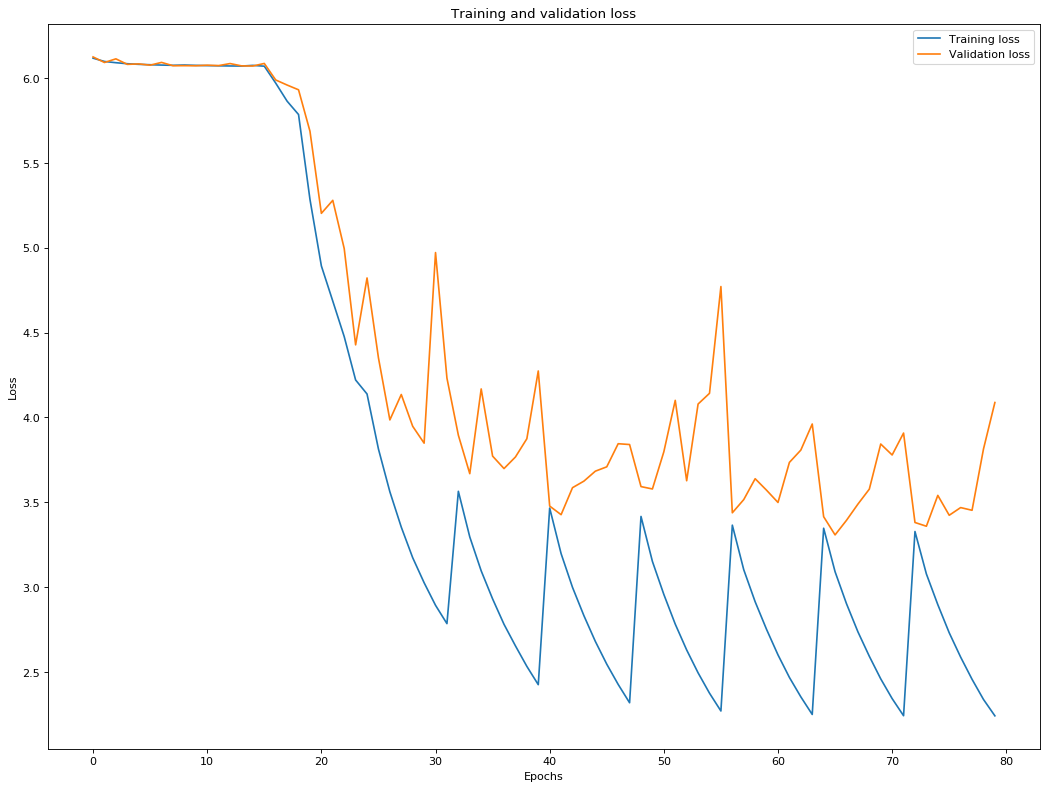

In [0]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(flatloss, label='Training loss') 
plt.plot(flatval, label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

In [0]:
dynamicBatch = True

#historyloss2 = []  
#histoyvalloss2 = []
for i in range(30):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 80000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    history = modelplot.fit(input_data, {'policy': policy, 'value': value},
            epochs=1, batch_size=128, validation_split=0.1)
    historyloss2.append(history.history['loss']) 
    histoyvalloss2.append(history.history['val_loss'])






BOUCLE :  0
Train on 72000 samples, validate on 8000 samples
72000/72000 [==============================] - 20s 283us/sample - loss: 2.9692 - policy_loss: 2.7538 - value_loss: 0.2154 - val_loss: 2.9566 - val_policy_loss: 2.7420 - val_value_loss: 0.2177
BOUCLE :  1
Train on 72000 samples, validate on 8000 samples
72000/72000 [==============================] - 20s 283us/sample - loss: 2.9644 - policy_loss: 2.7484 - value_loss: 0.2157 - val_loss: 2.9798 - val_policy_loss: 2.7673 - val_value_loss: 0.2146
BOUCLE :  2
Train on 72000 samples, validate on 8000 samples
72000/72000 [==============================] - 20s 283us/sample - loss: 2.9540 - policy_loss: 2.7389 - value_loss: 0.2151 - val_loss: 3.0044 - val_policy_loss: 2.7835 - val_value_loss: 0.2182
BOUCLE :  3
Train on 72000 samples, validate on 8000 samples
72000/72000 [==============================] - 20s 283us/sample - loss: 2.9665 - policy_loss: 2.7517 - value_loss: 0.2148 - val_loss: 3.0113 - val_policy_loss: 2.7956 - val_value_l

In [0]:
flatloss2 =  []
for x in historyloss2 :
  for h in x:
    flatloss2.append(h)
flatval2 = []
for x in histoyvalloss2 :
  for h in x:
    flatval2.append(h)

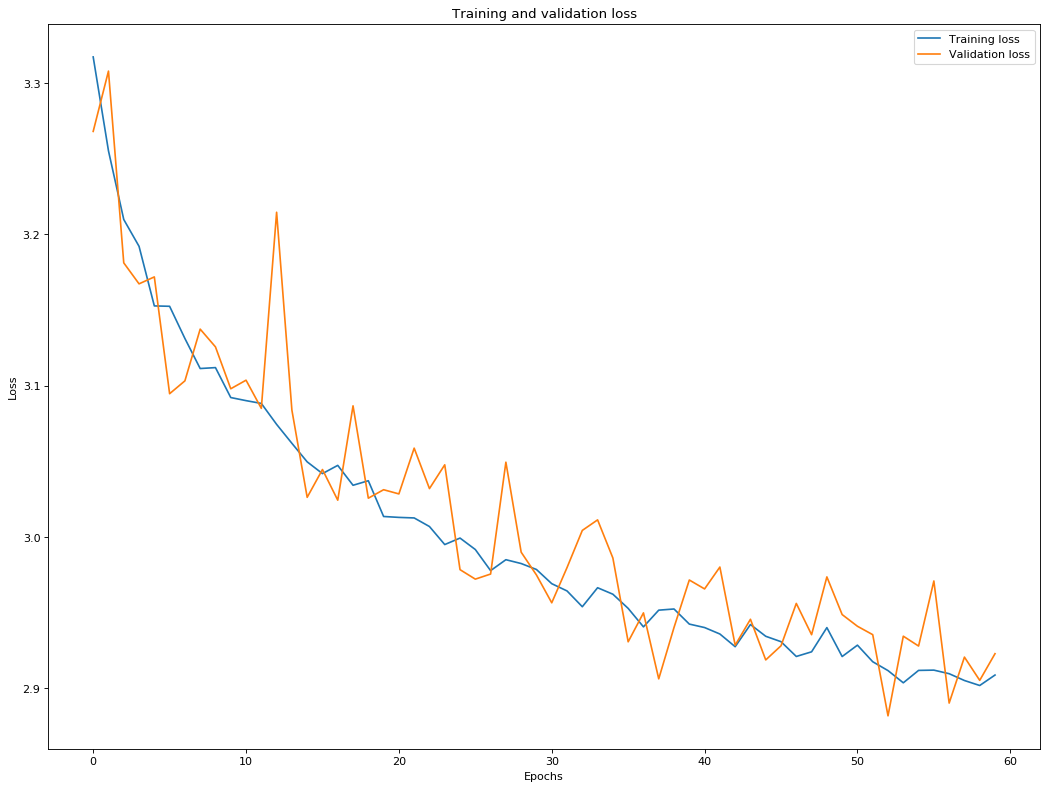

In [0]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(flatloss2, label='Training loss') 
plt.plot(flatval2, label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

In [0]:
modelbest = tf.keras.models.load_model(
      'GouteuxFinal.h5',
    custom_objects=None,
    compile=True)

#ENTRAINEMENT PHASE 1  
## 30 Boucles, N = 100 000 , 6 epochs, Learning rate = 0.1


In [0]:
dynamicBatch = True


for i in range(30):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 100000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    modelbest.fit(input_data, {'policy': policy, 'value': value},
            epochs=6, batch_size=128, validation_split=0.1)

modelbest.save('GouteuxFinal')



#ENTRAINEMENT PHASE 2  
## 100 Boucles, N = 50 000 , 1 epochs, Learning rate = 0.1


In [0]:
dynamicBatch = True


for i in range(100):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 50000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    modelbest.fit(input_data, {'policy': policy, 'value': value},
            epochs=1, batch_size=128, validation_split=0.1)

modelbest.save('GouteuxFinal')



#ENTRAINEMENT PHASE 3  
## 200 Boucles, N = 50 000 , 4 epochs, Learning rate = 0.01
## 200 Boucles, N = 50 000 , 4 epochs, Learning rate = 0.002




In [0]:
dynamicBatch = True

modelbest.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

for i in range(200):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 50000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    modelbest.fit(input_data, {'policy': policy, 'value': value},
            epochs=4, batch_size=128, validation_split=0.1)


modelbest.compile(optimizer=keras.optimizers.SGD(lr=0.002),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

for i in range(200):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 50000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    modelbest.fit(input_data, {'policy': policy, 'value': value},
            epochs=4, batch_size=128, validation_split=0.1)


modelbest.save('GouteuxFinal')



In [0]:
 # Test sur learning rate 
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.002),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss={'value': 'mse', 'policy': 'categorical_crossentropy'})

In [0]:
dynamicBatch = True


for i in range(200):
    print("BOUCLE : ",i)
    if dynamicBatch:
      N = 50000
      input_data = np.random.randint(2, size=(N, 19, 19, planes))
      input_data = input_data.astype ('float32')
      
      policy = np.random.randint(moves, size=(N,))
      policy = keras.utils.to_categorical (policy)
      
      value = np.random.randint(2, size=(N,))
      value = value.astype ('float32')
      
      end = np.random.randint(2, size=(N, 19, 19, 2))
      end = end.astype ('float32')

      golois.getBatch (input_data, policy, value, end)
    else:
      input_data = np.load ('input_data.npy')
      policy = np.load ('policy.npy')
      value = np.load ('value.npy')
      end = np.load ('end.npy')

    model1.fit(input_data, {'policy': policy, 'value': value},
            epochs=2, batch_size=128, validation_split=0.1)
    model2.fit(input_data, {'policy': policy, 'value': value},
            epochs=2, batch_size=128, validation_split=0.1)

model1.save('GouteuxFinal2')



In [8]:
#Test
 N = 100000
input_data_test = np.random.randint(2, size=(N, 19, 19, planes))
input_data_test = input_data_test.astype ('float32')

policy_test = np.random.randint(moves, size=(N,))
policy_test = keras.utils.to_categorical (policy_test)

value_test = np.random.randint(2, size=(N,))
value_test = value_test.astype ('float32')

end_test = np.random.randint(2, size=(N, 19, 19, 2))
end_test = end_test.astype ('float32')

golois.getBatch (input_data_test, policy_test, value_test, end_test)

modelfinalgo.evaluate(input_data_test, {'policy': policy_test, 'value': value_test})

100000/100000 [==============================] - 25s 250us/sample - loss: 2.5019 - policy_loss: 2.2928 - value_loss: 0.2091


[2.5019439861679076, 2.2928429, 0.20910242]